In [7]:
import sys
sys.path.append("../")

import pandas as pd
import os
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
import numpy as np

from library import regulations
from library import analysis
from library import tables

In [8]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",")

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,416) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


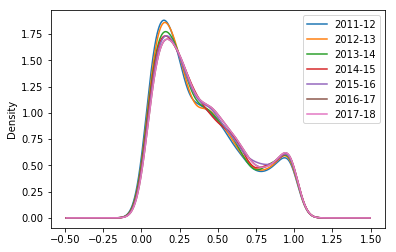

In [9]:
years = ['yr1112', 'yr1213', 'yr1314', 'yr1415', 'yr1516', 'yr1617', 'yr1718']
for yr in years:
    data['students_hisp'][data.year == yr].plot(kind='density', bw_method = .2) 
plt.legend(['2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18'])


/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:6: Matplotl

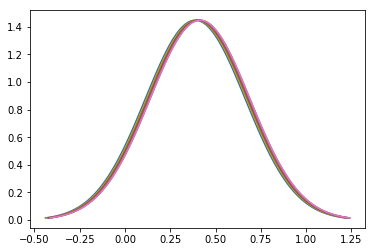

In [10]:
for yr in years:
    mu = np.mean(data['students_hisp'][data.year == yr])
    variance = np.var(data['students_hisp'][data.year == 'yr1718'])
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x,mlab.normpdf(x, mu, sigma))


plt.show()

In [11]:
df = pd.DataFrame(data.groupby(by = data.year)['students_hisp', 'students_white'].mean())
df['years'] = [2012, 2013, 2014, 2015, 2016, 2017, 2018]
df # check. This can't be right. 2017 and 2018 are exactly equal

,students_hisp,students_white,years
year,,,
yr1112,0.387841,0.480602,2012
yr1213,0.394962,0.471911,2013
yr1314,0.400883,0.465311,2014
yr1415,0.405828,0.459452,2015
yr1516,0.409765,0.457800,2016
yr1617,0.414019,0.455040,2017
yr1718,0.414019,0.455040,2018


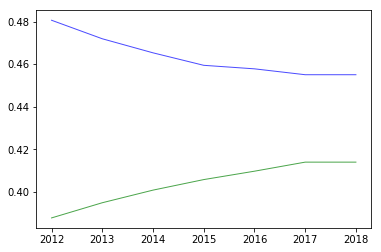

In [12]:
plt.plot(df.years,df.students_hisp, marker='', color='green', linewidth=1, alpha=0.7, label = 'Eligible TPS')
plt.plot(df.years,df.students_white, marker='', color='blue', linewidth=1, alpha=0.7, label = 'Eligible TPS')

In [13]:
df = pd.DataFrame(data[data.year != 'yr1718'].groupby(by = data.year)['students_hisp_num','students_white_num', 'students_black_num', 'students_num'].sum()/1000000)
df['years'] = [2012, 2013, 2014, 2015, 2016, 2017]
df # No 2017-18 data yet. Just a copy of 2016-17

,students_hisp_num,students_white_num,students_black_num,students_num,years
year,,,,,
yr1112,2.522684,1.518178,0.630237,4.959440,2012
yr1213,2.590040,1.513939,0.636280,5.040584,2013
yr1314,2.657013,1.509507,0.649239,5.128068,2014
yr1415,2.714266,1.509555,0.659074,5.215282,2015
yr1516,2.760302,1.507225,0.666933,5.284252,2016
yr1617,2.802180,1.499559,0.673291,5.343834,2017


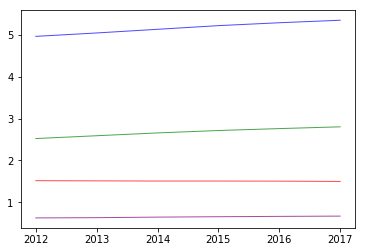

In [14]:
plt.plot(df.years,df.students_hisp_num, marker='', color='green', linewidth=1, alpha=0.7)
plt.plot(df.years,df.students_num, marker='', color='blue', linewidth=1, alpha=0.7)
plt.plot(df.years,df.students_white_num, marker='', color='red', linewidth=1, alpha=0.7)
plt.plot(df.years,df.students_black_num, marker='', color='purple', linewidth=1, alpha=0.7)